# Assignment 2

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
data = pd.read_csv("/content/Traffic_Violations.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1292399 non-null  object 
 1   Time Of Stop             1292399 non-null  object 
 2   Agency                   1292399 non-null  object 
 3   SubAgency                1292389 non-null  object 
 4   Description              1292390 non-null  object 
 5   Location                 1292397 non-null  object 
 6   Latitude                 1197045 non-null  float64
 7   Longitude                1197045 non-null  float64
 8   Accident                 1292399 non-null  object 
 9   Belts                    1292399 non-null  object 
 10  Personal Injury          1292399 non-null  object 
 11  Property Damage          1292399 non-null  object 
 12  Fatal                    1292399 non-null  object 
 13  Commercial License       1292399 non-null 

In [ ]:
#get the null value count
data.columns = data.columns.str.replace(' ', '')
data.isna().sum()

DateOfStop                   0
TimeOfStop                   0
Agency                       0
SubAgency                   10
Description                  9
Location                     2
Latitude                 95354
Longitude                95354
Accident                     0
Belts                        0
PersonalInjury               0
PropertyDamage               0
Fatal                        0
CommercialLicense            0
HAZMAT                       0
CommercialVehicle            0
Alcohol                      0
WorkZone                     0
State                       59
VehicleType                  0
Year                      8074
Make                        57
Model                      187
Color                    16127
ViolationType                0
Charge                       0
Article                  65169
ContributedToAccident        0
Race                         0
Gender                       0
DriverCity                 217
DriverState                 11
DLState 

In [ ]:
#remove unneccessary columns
data.drop(columns = ['Geolocation','Article','Latitude','Longitude','Description','Agency','SubAgency'], inplace=True)

# **To calculate the color count**

In [ ]:
data.dropna(subset = ['Color'], inplace = True) #remove the null values

In [ ]:
data['Color'].isna().sum() 

0

Text(27.125, 0.5, 'Number of Vehicles')

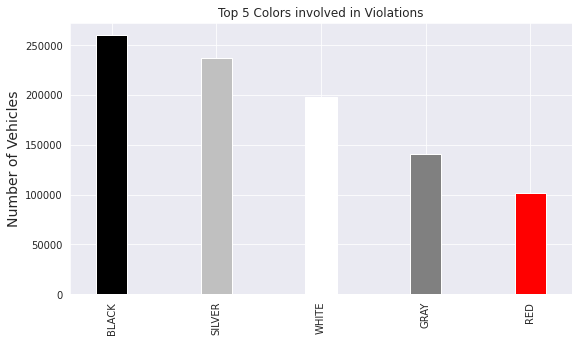

In [122]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.Color.value_counts()[:5].plot(kind="bar", width=0.3, figsize=(9, 5), color = ["black","silver","white","gray","red"])
plt.title("Top 5 Colors involved in Violations")
plt.ylabel("Number of Vehicles", fontsize=14)

In [ ]:
colordata=data.value_counts(["Color"]).head(10)
print(colordata)

Color     
BLACK         259499
SILVER        236828
WHITE         197558
GRAY          141092
RED           101733
BLUE           94814
GREEN          49520
GOLD           41177
BLUE, DARK     27111
TAN            27015
dtype: int64


# To find the most violated Make and Model 

In [ ]:
data.dropna(subset = ['Model','Make'], inplace = True) #remove na

In [ ]:
print(data['Model'].isna().sum())
print(data['Make'].isna().sum())

0
0


In [ ]:
#combine the redundant values
data['Make'] = np.where(
   (data['Make'] =='HONODA') & (data['Make'] == 'HINDA') & (data['Make'] =='HHONDA') & (data['Make'] == 'HINDA') & (data['Make'] =='HNODA') & (data['Make'] == 'HONDA1') & (data['Make'] =='HONA') & (data['Make'] == 'HOBDA'), 'HONDA', data['Make']
   )

data['Make'] = np.where(
   (data['Make'] =='TOYOT') & (data['Make'] == '1=TOYOT') & (data['Make'] =='TOYOA') & (data['Make'] == 'TOYOOTA') & (data['Make'] =='TOYOAT') & (data['Make'] == 'TOY') & (data['Make'] =='TOYITA') & (data['Make'] == 'TOY0A'), 'TOYOTA', data['Make']
   )

In [ ]:
#Method 2 for redundant value combining

data['Make'].mask(data['Make'] == 'HOBDA', "HONDA", inplace=True) #replace every word in a single instance using masking

In [92]:
car_make_data=data.value_counts(["Make"])

In [94]:
car_make_data.head(4)

Make  
TOYOTA    217695
HONDA     137459
FORD      120801
NISSAN     67918
dtype: int64

Text(25.625, 0.5, 'Number of Vehicles')

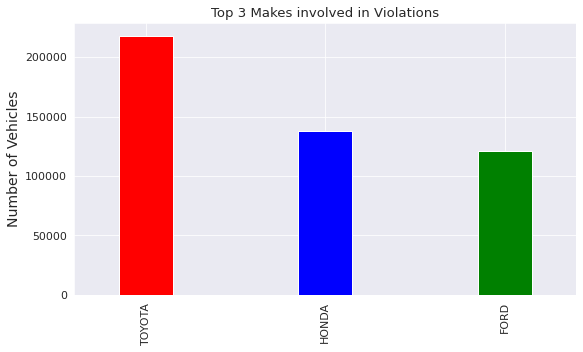

In [96]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.Make.value_counts()[:3].plot(kind="bar", width=0.3, figsize=(9, 5), color = ["r","b","g"])
plt.title("Top 3 Makes involved in Violations")
plt.ylabel("Number of Vehicles", fontsize=14)

In [ ]:
makedata=data.value_counts(["Make", "Model"])
makedata_df=makedata.to_frame()

In [120]:
print("Top 5 Violated Models")
makedata_df.head(5)

Top 5 Violated Models


0
Make   Model         
TOYOTA CAMRY    42141
HONDA  ACCORD   41859
       CIVIC    39222
TOYOTA COROLLA  37265
       4S       27272

**Racial Estimation**

Text(25.625, 0.5, 'Number of Violations')

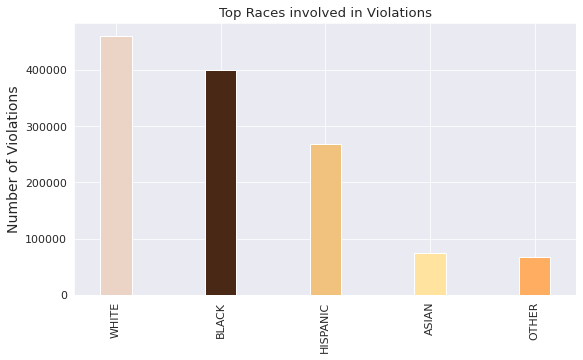

In [116]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.Race.value_counts()[:5].plot(kind="bar", width=0.3, figsize=(9, 5), color = ["#EBD3C5","#492816","#F1C27D","#FFE39F","#FFAD60"])
plt.title("Top Races involved in Violations")
plt.ylabel("Number of Violations", fontsize=14)

**Gender Estimation**

Text(25.625, 0.5, 'Number of Drivers')

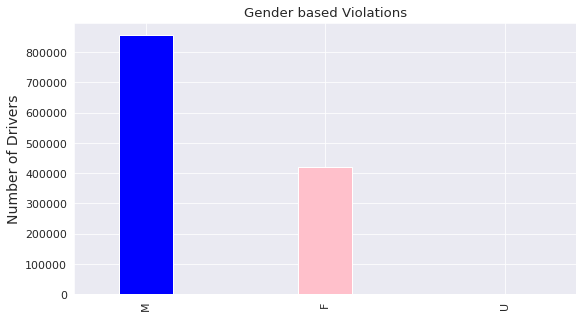

In [119]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.Gender.value_counts().plot(kind="bar", width=0.3, figsize=(9, 5), color = ["blue","pink","black"])
plt.title("Gender based Violations")
plt.ylabel("Number of Drivers", fontsize=14)

In [ ]:
# number of driver genders involved in the dataset
genders = (data.pivot_table(index='Gender',columns='Gender', aggfunc='size', fill_value=0).add_prefix('Gender '))
genders

Gender,Gender F,Gender M,Gender U
Gender,,,
F,419613,0,0
M,0,855085,0
U,0,0,1431


Text(25.625, 0.5, 'Number of drivers')

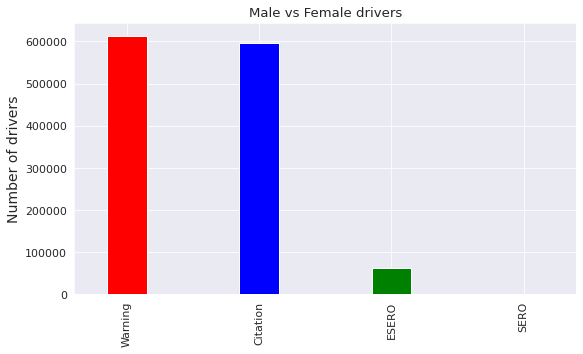

In [ ]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.ViolationType.value_counts().plot(kind="bar", width=0.3, figsize=(9, 5), color = ["r","b","g","gray"])
plt.title("Male vs Female drivers")
plt.ylabel("Number of drivers", fontsize=14)

In [ ]:
pd.crosstab(columns=data['ViolationType'], index='ViolationType', margins=True)

ViolationType,Citation,ESERO,SERO,Warning,All
row_0,,,,,
ViolationType,597478,63807,911,613933,1276129
All,597478,63807,911,613933,1276129


In [ ]:
# from the above crosstable we can get the ratio of the citated drivers relative to other categories
citation_count = pd.crosstab(columns=data['ViolationType'], index='ViolationType', margins=True)['Citation'][0]
violations_count = pd.crosstab(columns=data['ViolationType'], index='ViolationType', margins=True)['All'][0]
print(f"Citation is given to {round(citation_count*100/violations_count)}% of the totally stopped drivers")

Citation is given to 47% of the totally stopped drivers


In [ ]:
#Alcohol based Violation and Results

C=data.pivot_table(index='Alcohol',columns='ViolationType', aggfunc='size', fill_value=0)['Citation']
W=data.pivot_table(index='Alcohol',columns='ViolationType', aggfunc='size', fill_value=0)['Warning']
print(C,W)

Alcohol
No     595399
Yes      2079
Name: Citation, dtype: int64 Alcohol
No     613818
Yes       115
Name: Warning, dtype: int64


Text(25.625, 0.5, 'Number of drivers')

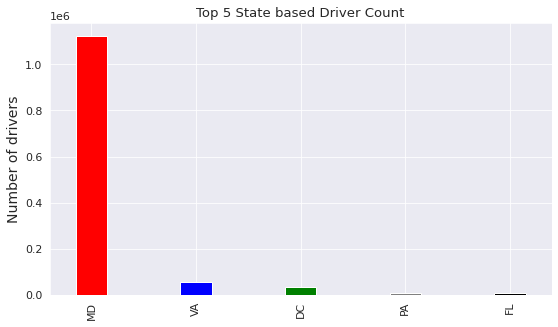

In [91]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.State.value_counts()[:5].plot(kind="bar", width=0.3, figsize=(9, 5), color = ["r","b","g","gray","black"])
plt.title("Top 5 State based Driver Count")
plt.ylabel("Number of drivers", fontsize=14)

In [90]:
print("State wise examined driver Count")
Statedata=data.value_counts(["State"])
Statedata_df=Statedata.to_frame()[:5]
Statedata_df

State wise examined driver Count


,0
State,
MD,1123544
VA,53438
DC,32168
PA,9185
FL,5811


Text(25.625, 0.5, 'Number of drivers')

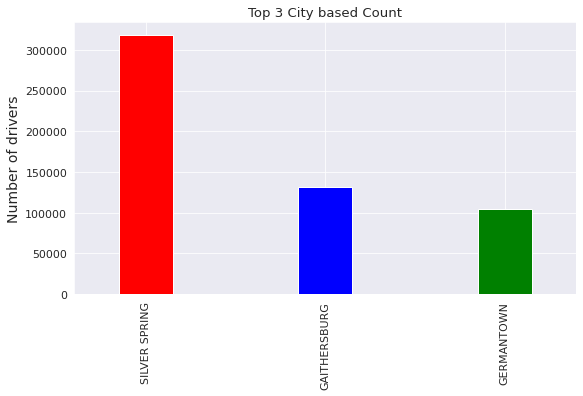

In [84]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.DriverCity.value_counts()[:3].plot(kind="bar", width=0.3, figsize=(9, 5), color = ["r","b","g"])
plt.title("Top 3 City based Count")
plt.ylabel("Number of drivers", fontsize=14)

In [85]:
print("Maryland's Traffic Violation Hotspots")
Citydata=data.value_counts(["State", "DriverCity"])
Citydata_df=Citydata.to_frame()[:3]
Citydata_df

Maryland's Traffic Violation Hotspots


0
State DriverCity           
MD    SILVER SPRING  298710
      GAITHERSBURG   124763
      GERMANTOWN      99603